# Soal


##1.	Hitunglah PageRank dari graph berikut

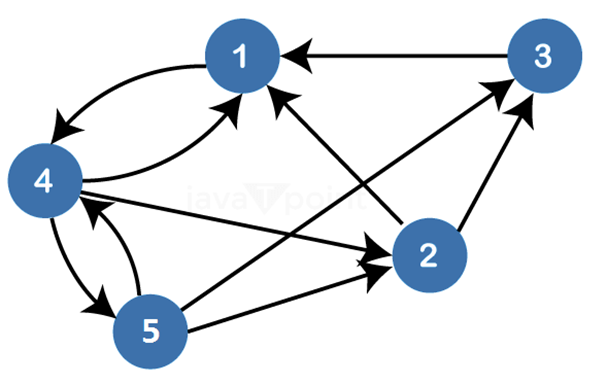

###Jawaban

Hasil PageRank:
Node 1: 0.3438
Node 2: 0.2115
Node 3: 0.2361
Node 4: 0.1253
Node 5: 0.0833


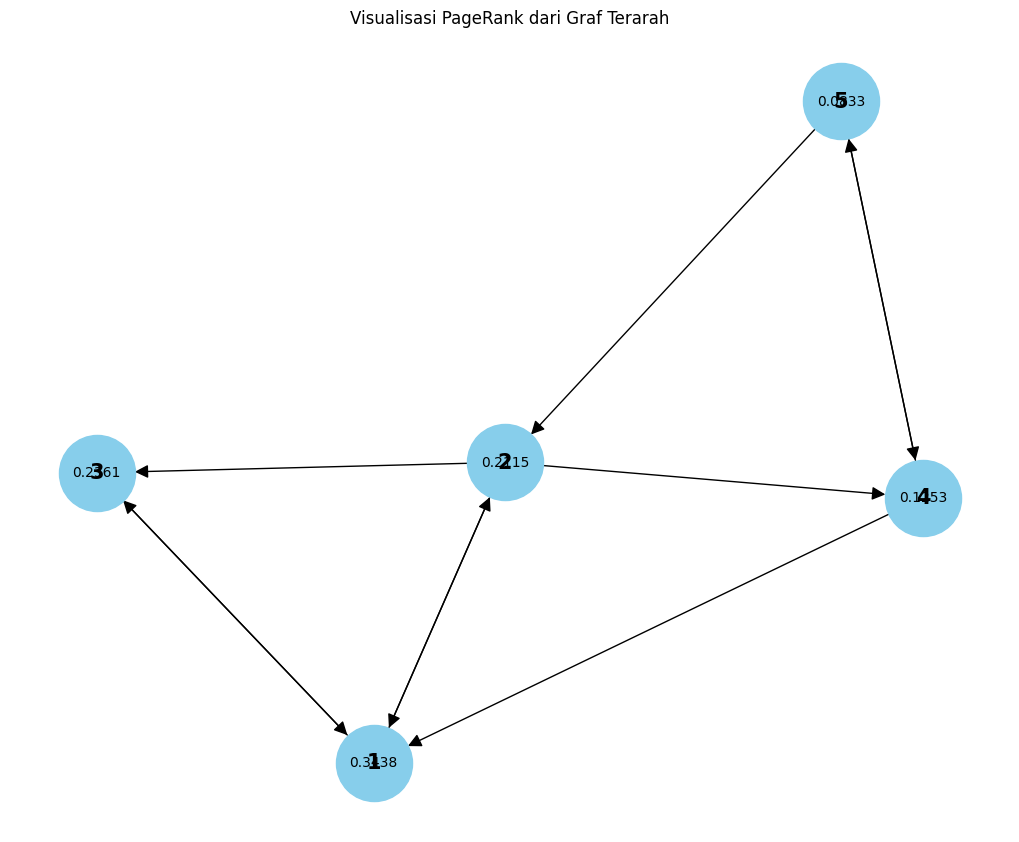

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat graf terarah
G = nx.DiGraph()

# Menambahkan edges ke graf
edges = [
    (1, 2), (1, 3),
    (2, 1), (2, 3), (2, 4),
    (3, 1),
    (4, 1), (4, 5),
    (5, 4), (5, 2)
]

G.add_edges_from(edges)

# Menghitung PageRank
pagerank = nx.pagerank(G)

# Menyiapkan hasil PageRank dalam format yang mudah dibaca
pagerank_results = {node: round(rank, 4) for node, rank in pagerank.items()}

# Menampilkan hasil PageRank dalam bentuk angka
print("Hasil PageRank:")
for node, rank in pagerank_results.items():
    print(f"Node {node}: {rank:.4f}")

# Visualisasi graf
pos = nx.spring_layout(G)  # posisi node dalam graf
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=15, font_weight='bold', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): '' for u, v in G.edges()}, font_color='red')
nx.draw_networkx_labels(G, pos, labels=pagerank_results, font_color='black', font_size=10)

# Menambahkan judul
plt.title("Visualisasi PageRank dari Graf Terarah")
plt.show()


##2.	Carilah penyelesaian dari Sistem persamaan berikut  dengan Eliminasi Gauss

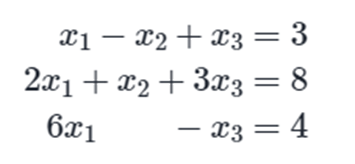

###jawaban

In [ ]:
import numpy as np

# Matriks augmented
A = np.array([
    [1, -1, 1, 3],
    [2, 1, 3, 8],
    [6, 0, -1, 4]
], dtype=float)

# Eliminasi Gauss
n = len(A)

for i in range(n):
    # Mencari elemen maksimum di kolom i
    max_row = i + np.argmax(np.abs(A[i:, i]))
    # Tukar baris untuk elemen maksimum
    A[[i, max_row]] = A[[max_row, i]]

    # Buat elemen diagonal menjadi 1
    A[i] = A[i] / A[i, i]

    # Eliminasi elemen di bawah elemen diagonal
    for j in range(i + 1, n):
        A[j] = A[j] - A[i] * A[j, i]

# Substitusi balik
x = np.zeros(n)
for i in range(n-1, -1, -1):
    x[i] = A[i, -1] - np.sum(A[i, i+1:n] * x[i+1:n])

print("Solusi:", x)


Solusi: [1. 0. 2.]


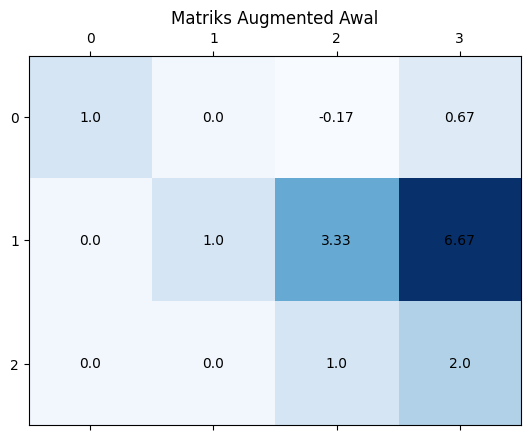

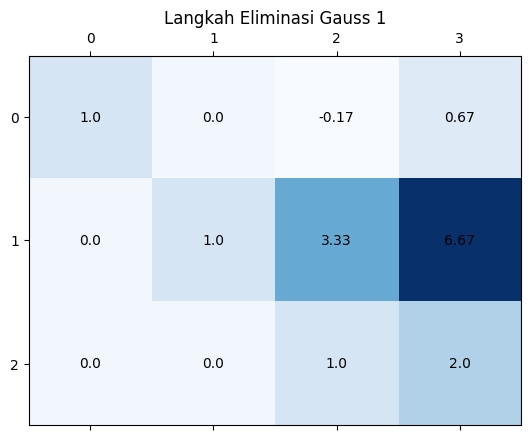

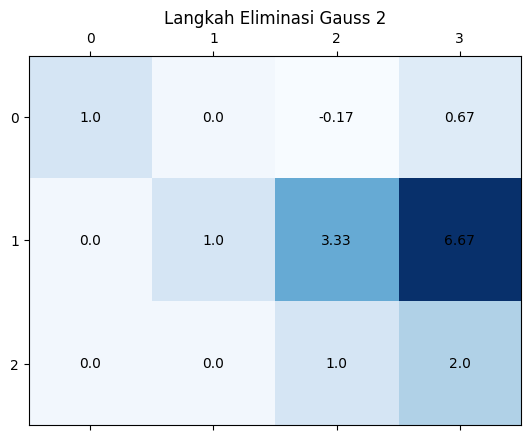

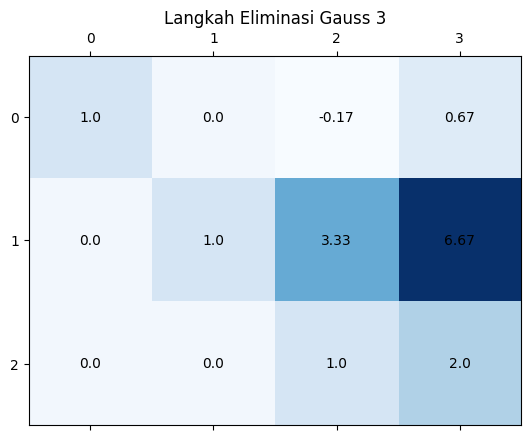

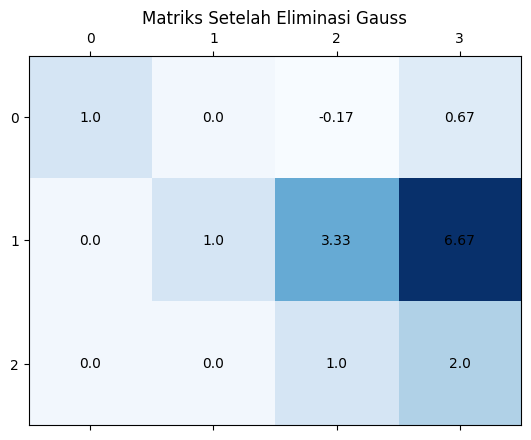

Solusi: [1. 0. 2.]


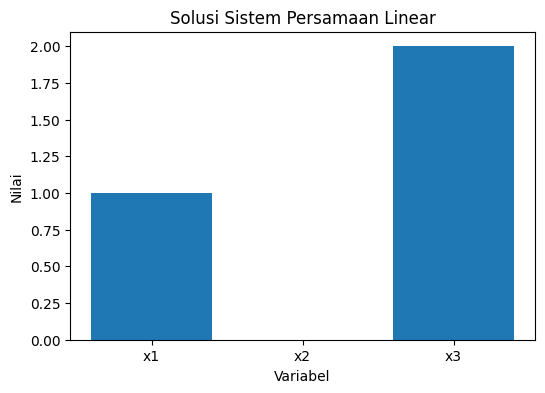

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan matriks
def display_matrix(matrix, title=""):
    fig, ax = plt.subplots()
    ax.matshow(matrix, cmap=plt.cm.Blues)

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            c = matrix[i, j]
            ax.text(j, i, str(round(c, 2)), va='center', ha='center')

    plt.title(title)
    plt.show()

# Menampilkan matriks augmented awal
display_matrix(A, title="Matriks Augmented Awal")

# Proses eliminasi Gauss dan menampilkan setiap langkah
for i in range(n):
    max_row = i + np.argmax(np.abs(A[i:, i]))
    A[[i, max_row]] = A[[max_row, i]]
    A[i] = A[i] / A[i, i]
    for j in range(i + 1, n):
        A[j] = A[j] - A[i] * A[j, i]
    display_matrix(A, title=f"Langkah Eliminasi Gauss {i+1}")

# Menampilkan matriks setelah eliminasi Gauss
display_matrix(A, title="Matriks Setelah Eliminasi Gauss")

# Solusi akhir
x = np.zeros(n)
for i in range(n-1, -1, -1):
    x[i] = A[i, -1] - np.sum(A[i, i+1:n] * x[i+1:n])

print("Solusi:", x)

# Visualisasi solusi akhir
plt.figure(figsize=(6, 4))
plt.bar(range(1, n+1), x, tick_label=[f'x{i}' for i in range(1, n+1)])
plt.xlabel('Variabel')
plt.ylabel('Nilai')
plt.title('Solusi Sistem Persamaan Linear')
plt.show()
